In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()
tf.executing_eagerly()

True

In [2]:
tfe = tf.contrib.eager
L = tf.keras.layers

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

print(x_train.shape)

(15, 1)


In [4]:
x_train_ = tf.convert_to_tensor(x_train)
y_train_ = tf.convert_to_tensor(y_train)


In [5]:
model = L.Dense(1)

def loss_fn(model, x, y):
    predict_y = model(x)
    return tf.keras.losses.mean_squared_error(predict_y, y)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)


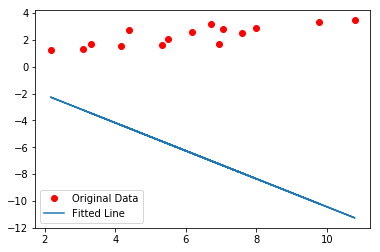

In [6]:
predicted = model(x_train_).numpy()
plt.plot(x_train, y_train, 'ro', label="Original Data")
plt.plot(x_train, predicted, label="Fitted Line")
plt.legend()
plt.show()

In [7]:
for epoch in range(100):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x_train_, y_train_)
    grads = tape.gradient(loss, model.variables)
    
    if (epoch+1) % 5 == 0:
        print("loss: ", tf.reduce_sum(loss).numpy())
    optimizer.apply_gradients(zip(grads, model.variables))

loss:  419.49127
loss:  107.04103
loss:  29.056465
loss:  9.591009
loss:  4.7310443
loss:  3.516392
loss:  3.2115638
loss:  3.1338196
loss:  3.1127589
loss:  3.105852
loss:  3.1024826
loss:  3.1000044
loss:  3.097754
loss:  3.0955667
loss:  3.0934012
loss:  3.0912485
loss:  3.089104
loss:  3.0869682
loss:  3.084841
loss:  3.082721


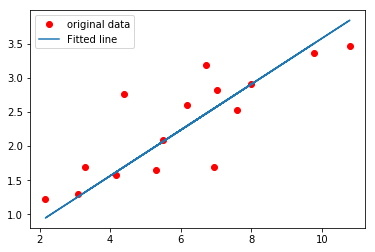

In [8]:
predicted = model(x_train_).numpy()
plt.plot(x_train, y_train, "ro", label="original data")
plt.plot(x_train_, predicted, label="Fitted line")
plt.legend()
plt.show()